In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def loadResult(filePath):
    return pd.read_csv(filePath,
                        header=None,
                        skiprows=1,
                        names=['IdScenary','TotalRepeats','TotalFolds','ExecutionNumber','CurrentRepeatNumber', 'CurrentFoldNumber',
                               'DatabaseName','DistanceMethod','ElipsedTrainingTime','ElipsedPredict1Time','ElipsedPredict2Time',
                               'ErrorPredict1', 'ErrorPredict2'
                               ])


#creating an empty dataframe
dfResults = pd.DataFrame(columns=['IdScenary','TotalRepeats','TotalFolds','ExecutionNumber','CurrentRepeatNumber', 'CurrentFoldNumber',
                               'DatabaseName','DistanceMethod','ElipsedTrainingTime','ElipsedPredict1Time','ElipsedPredict2Time',
                               'ErrorPredict1', 'ErrorPredict2'
                               ])

#appending results
dfResults = pd.concat([dfResults, loadResult('~/saida_full.txt')], ignore_index=True)
#dfResults = pd.concat([dfResults, loadResult('~/saida2.txt')], ignore_index=True)
#dfResults = pd.concat([dfResults, loadResult('~/saida3.txt')], ignore_index=True)
# dfResults = pd.concat([dfResults, loadResult('~/saida4.txt')], ignore_index=True)
# dfResults = pd.concat([dfResults, loadResult('~/saida5.txt')], ignore_index=True)
# dfResults = pd.concat([dfResults, loadResult('~/saida6.txt')], ignore_index=True)
# dfResults = pd.concat([dfResults, loadResult('~/saida7.txt')], ignore_index=True)
# dfResults = pd.concat([dfResults, loadResult('~/saida8.txt')], ignore_index=True)
# dfResults = pd.concat([dfResults, loadResult('~/saida9.txt')], ignore_index=True)
# dfResults = pd.concat([dfResults, loadResult('~/saida16.txt')], ignore_index=True)
# dfResults = pd.concat([dfResults, loadResult('~/saida17.txt')], ignore_index=True)
# dfResults = pd.concat([dfResults, loadResult('~/saida18.txt')], ignore_index=True)

#creating accuracy columns
dfResults["AccuracyPredict1"] = (1 - dfResults["ErrorPredict1"])*100
dfResults["AccuracyPredict2"] = (1 - dfResults["ErrorPredict2"])*100

#replacing distanceMethod values
replaceDict = {1: "Serial", 3: "CPU Multi-thread", 4: "GPU"}
dfResults['DistanceMethod'] = dfResults['DistanceMethod'].map(replaceDict)

dfResults

['Iris' 'Sonar' 'GlassIdentification' 'Bands' 'LibrasMovement'
 'ElectricalFaultDetection' 'ElectricalFaultClassification']
150
208
214
365
360
10
10


,IdScenary,TotalRepeats,TotalFolds,ExecutionNumber,CurrentRepeatNumber,CurrentFoldNumber,DatabaseName,DistanceMethod,ElipsedTrainingTime,ElipsedPredict1Time,ElipsedPredict2Time,ErrorPredict1,ErrorPredict2,AccuracyPredict1,AccuracyPredict2
0,0,30,150,0,0,0,Iris,Serial,0.061901,0.028132,0.000223,0.000000,0.000000,100.000000,100.000000
1,0,30,150,1,0,1,Iris,Serial,0.023278,0.000199,0.000065,0.000000,0.000000,100.000000,100.000000
2,0,30,150,2,0,2,Iris,Serial,0.017507,0.000189,0.000065,0.000000,0.000000,100.000000,100.000000
3,0,30,150,3,0,3,Iris,Serial,0.018549,0.000198,0.000065,0.000000,0.000000,100.000000,100.000000
4,0,30,150,4,0,4,Iris,Serial,0.012851,0.000187,0.000063,0.000000,0.000000,100.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118525,20,30,10,295,29,5,ElectricalFaultClassification,GPU,98.157045,0.002724,1.671709,0.189567,0.185751,81.043257,81.424936
118526,20,30,10,296,29,6,ElectricalFaultClassification,GPU,93.772610,0.002809,1.693445,0.170483,0.164122,82.951654,83.587786
118527,20,30,10,297,29,7,ElectricalFaultClassification,GPU,65.297209,0.002537,1.494801,0.167939,0.160305,83.206107,83.969466
118528,20,30,10,298,29,8,ElectricalFaultClassification,GPU,94.869724,0.002860,1.631922,0.170483,0.151399,82.951654,84.860051


In [2]:
dfStatistics = dfResults.describe()

dfStatistics

,ElipsedTrainingTime,ElipsedPredict1Time,ElipsedPredict2Time,ErrorPredict1,ErrorPredict2,AccuracyPredict1,AccuracyPredict2
count,118530.000000,118530.000000,118530.000000,118530.000000,118530.000000,118530.000000,118530.000000
mean,1.491484,0.000396,0.018479,0.219615,0.218200,78.038537,78.179955
std,7.967870,0.000240,0.164345,0.412567,0.411666,41.256749,41.166553
min,0.003286,0.000170,0.000059,0.000000,0.000000,0.000000,0.000000
25%,0.205953,0.000272,0.000329,0.000000,0.000000,100.000000,100.000000
50%,0.968808,0.000343,0.001052,0.000000,0.000000,100.000000,100.000000
75%,1.304623,0.000544,0.002059,0.000000,0.000000,100.000000,100.000000
max,435.858979,0.028132,2.678583,1.000000,1.000000,100.000000,100.000000


In [3]:
groupedByDatabaseDistanceRepead = dfResults.groupby(
                                ['DatabaseName','DistanceMethod', 'CurrentRepeatNumber']
                              ).agg(
                                     ElipsedTimeTraining=('ElipsedTrainingTime','sum'),
                                     ElipsedTimePredict1=('ElipsedPredict1Time','sum'),
                                     ElipsedTimePredict2=('ElipsedPredict2Time','sum'),
                                     AccuracyPredict1=('AccuracyPredict1','mean'),
                                     AccuracyPredict2=('AccuracyPredict2','mean')
                                    )

groupedByDatabaseDistanceRepead

ElipsedTimeTraining  \
DatabaseName DistanceMethod   CurrentRepeatNumber                        
Bands        CPU Multi-thread 0                             539.119806   
                              1                             544.585069   
                              2                             537.900275   
                              3                             540.782322   
                              4                             536.880813   
...                                                                ...   
Sonar        Serial           25                             29.416348   
                              26                             29.654502   
                              27                             29.075794   
                              28                             29.483514   
                              29                             29.353590   

                                                   ElipsedTimePredict1  \
DatabaseName DistanceMethod   CurrentRepeatNumber                        
Bands        CPU Multi-thread 0                               0.124665   
                              1                               0.127232   
                              2                               0.125963   
                              3                               0.125771   
                              4                               0.124390   
...                                                                ...   
Sonar        Serial           25                              0.071780   
                              26                              0.071666   
                              27                              0.071311   
                              28                              0.072577   
                              29                              0.071086   

                                                   ElipsedTimePredict2  \
DatabaseName DistanceMethod   CurrentRepeatNumber                        
Bands        CPU Multi-thread 0                               0.618814   
                              1                               0.613188   
                              2                               0.612841   
                              3                               0.627516   
                              4                               0.616132   
...                                                                ...   
Sonar        Serial           25                              0.167436   
                              26                              0.177398   
                              27                              0.170754   
                              28                              0.164340   
                              29                              0.165994   

                                                   AccuracyPredict1  \
DatabaseName DistanceMethod   CurrentRepeatNumber                     
Bands        CPU Multi-thread 0                           68.767123   
                              1                           69.041096   
                              2                           69.315068   
                              3                           69.315068   
                              4                           68.493151   
...                                                             ...   
Sonar        Serial           25                          87.019231   
                              26                          83.653846   
                              27                          83.653846   
                              28                          84.615385   
                              29                          85.096154   

                                                   AccuracyPredict2  
DatabaseName DistanceMethod   CurrentRepeatNumber                    
Bands        CPU Multi-thread 0                           70.684932  
                            

In [4]:
sumarizedByDatabaseDistanceRepeat = groupedByDatabaseDistanceRepead.reset_index()

sumarizedByDatabaseDistanceRepeat

,DatabaseName,DistanceMethod,CurrentRepeatNumber,ElipsedTimeTraining,ElipsedTimePredict1,ElipsedTimePredict2,AccuracyPredict1,AccuracyPredict2
0,Bands,CPU Multi-thread,0,539.119806,0.124665,0.618814,68.767123,70.684932
1,Bands,CPU Multi-thread,1,544.585069,0.127232,0.613188,69.041096,70.136986
2,Bands,CPU Multi-thread,2,537.900275,0.125963,0.612841,69.315068,70.958904
3,Bands,CPU Multi-thread,3,540.782322,0.125771,0.627516,69.315068,68.493151
4,Bands,CPU Multi-thread,4,536.880813,0.124390,0.616132,68.493151,70.410959
...,...,...,...,...,...,...,...,...
625,Sonar,Serial,25,29.416348,0.071780,0.167436,87.019231,83.653846
626,Sonar,Serial,26,29.654502,0.071666,0.177398,83.653846,80.769231
627,Sonar,Serial,27,29.075794,0.071311,0.170754,83.653846,84.615385
628,Sonar,Serial,28,29.483514,0.072577,0.164340,84.615385,87.980769


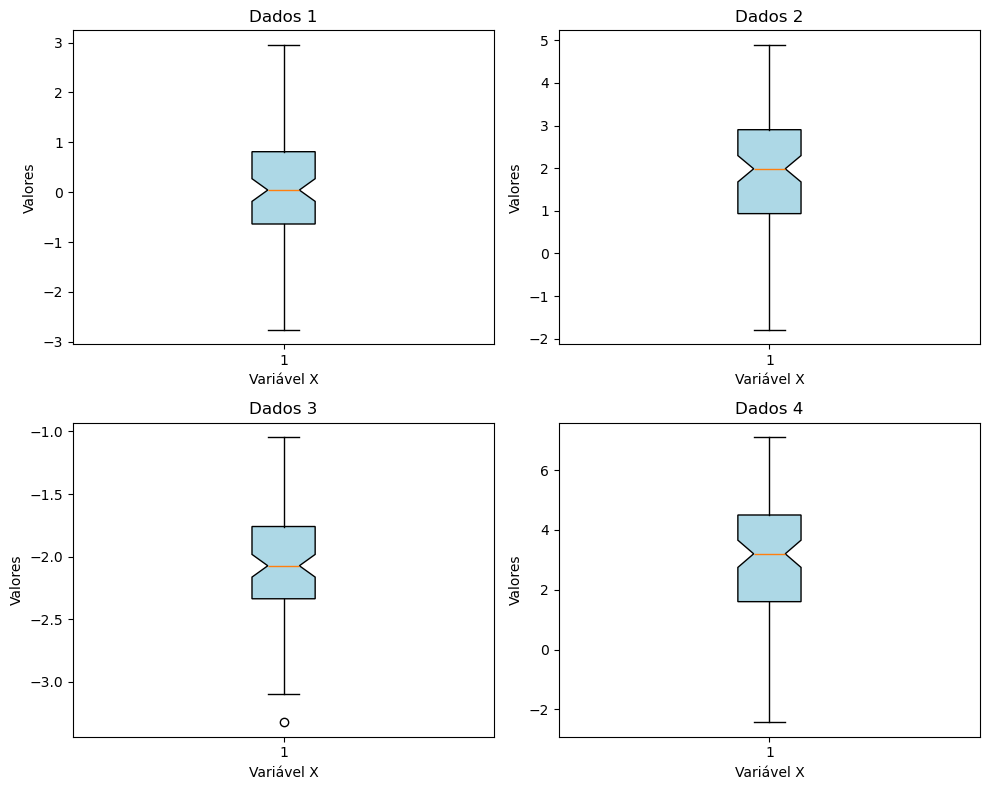

In [53]:

import matplotlib.pyplot as plt
import numpy as np

# 1. Criar dados aleatórios para os boxplots
data1 = np.random.normal(loc=0, scale=1, size=100)  # Distribuição normal
data2 = np.random.normal(loc=2, scale=1.5, size=100)
data3 = np.random.normal(loc=-2, scale=0.5, size=100)
data4 = np.random.normal(loc=3, scale=2, size=100)

# Lista com todos os conjuntos de dados
datasets = [data1, data2, data3, data4]

# 2. Criar figura e subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))  # 2x2 grid

# 3. Adicionar boxplots a cada subplot
for ax, data, title in zip(axes.flatten(), datasets, ['Dados 1', 'Dados 2', 'Dados 3', 'Dados 4']):
    # Criar boxplot
    boxplot = ax.boxplot(data,
                        vert=True,       # Orientação vertical
                        patch_artist=True,  # Permite preenchimento
                        notch=True)      # Notch para comparação
    
    # Customização (opcional)
    colors = ['lightblue', 'lightgreen', 'pink', 'orange']
    for patch in boxplot['boxes']:
        patch.set_facecolor(colors.pop(0))
    
    # Adicionar título e labels
    ax.set_title(title)
    ax.set_xlabel('Variável X')
    ax.set_ylabel('Valores')

# 4. Ajustar layout
plt.tight_layout()

# 5. Mostrar a figura
plt.show()

In [62]:
for i in range(0,7):
    print(f'{i} - {i//4} - {i%4}')

0 - 0 - 0
1 - 0 - 1
2 - 0 - 2
3 - 0 - 3
4 - 1 - 0
5 - 1 - 1
6 - 1 - 2


Bands - CPU Multi-thread
Bands - GPU
Bands - Serial
ElectricalFaultClassification - CPU Multi-thread
ElectricalFaultClassification - GPU
ElectricalFaultClassification - Serial
ElectricalFaultDetection - CPU Multi-thread
ElectricalFaultDetection - GPU
ElectricalFaultDetection - Serial
GlassIdentification - CPU Multi-thread
GlassIdentification - GPU
GlassIdentification - Serial
Iris - CPU Multi-thread
Iris - GPU
Iris - Serial
LibrasMovement - CPU Multi-thread
LibrasMovement - GPU
LibrasMovement - Serial
Sonar - CPU Multi-thread
Sonar - GPU
Sonar - Serial


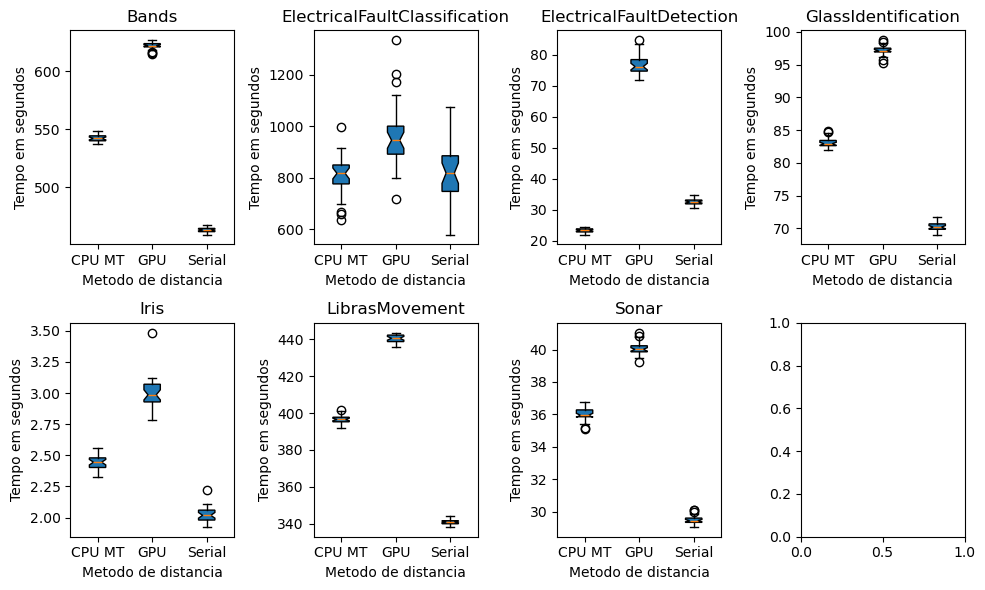

In [81]:
#create boxplot charts

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 6))  # 2x2 grid

databases = sumarizedByDatabaseDistanceRepeat['DatabaseName'].unique()

countDatabase = 0
for database in databases:
    dfTime = sumarizedByDatabaseDistanceRepeat[sumarizedByDatabaseDistanceRepeat['DatabaseName'] == database][['DatabaseName','DistanceMethod','ElipsedTimeTraining']]
    distanceMethods = dfTime['DistanceMethod'].unique()
    dfResults = pd.DataFrame()
    for distanceMethod in distanceMethods:
        print(database + " - " + distanceMethod)
        tmpSerie = dfTime[dfTime['DistanceMethod'] == distanceMethod]['ElipsedTimeTraining']
        tmpSerie.reset_index(drop=True, inplace=True)
        dfResults[distanceMethod] = tmpSerie

    # Creating plot
    axes[countDatabase//4, countDatabase%4].boxplot(dfResults, vert=True, patch_artist=True, notch=True)
    axes[countDatabase//4, countDatabase%4].set_title(database)
    axes[countDatabase//4, countDatabase%4].set_xlabel('Metodo de distancia')
    axes[countDatabase//4, countDatabase%4].set_ylabel('Tempo em segundos')
    axes[countDatabase//4, countDatabase%4].set_xticks([1,2,3])  # Define a posição do rótulo no eixo x
    axes[countDatabase//4, countDatabase%4].set_xticklabels(['CPU MT',"GPU",'Serial'])  # Define o rótulo

    countDatabase = countDatabase + 1

# show plot
plt.tight_layout()
plt.show()

In [78]:
#create table with all data sumarized

sumarizedGroup = sumarizedByDatabaseDistanceRepeat.groupby(
                                ['DatabaseName','DistanceMethod']
                                ).agg({
    'ElipsedTimeTraining': [('Mean', 'mean'),('Std', 'std')],  # Subcolunas dentro de 'Valor1'
    'ElipsedTimePredict1': [('Mean', 'mean'),('Std', 'std')],  # Subcolunas dentro de 'Valor1'
    'ElipsedTimePredict2': [('Mean', 'mean'),('Std', 'std')],  # Subcolunas dentro de 'Valor1'
    'AccuracyPredict1': [('Acuracia', 'mean'), ('Std', 'std')],  # Subcolunas dentro de 'Valor2'
    'AccuracyPredict2': [('Acuracia', 'mean'), ('Std', 'std')]  # Subcolunas dentro de 'Valor2'
     }).rename(columns={'ElipsedTimeTraining': 'Tempo Treinamento',
                   'ElipsedTimePredict1': 'Tempo Predict1',
                   'ElipsedTimePredict2': 'Tempo Predict2',
                   'AccuracyPredict1': 'Acuracia1',
                   'AccuracyPredict2': 'Acuracia2'
                   })

sumarizedGroup[('Tempo Treinamento', 'Mean')] = sumarizedGroup[('Tempo Treinamento', 'Mean')].map(lambda x: f"{x:.2f}")
sumarizedGroup[('Tempo Treinamento', 'Std')] = sumarizedGroup[('Tempo Treinamento', 'Std')].map(lambda x: f"{x:.2f}")
sumarizedGroup[('Tempo Predict1', 'Mean')] = sumarizedGroup[('Tempo Predict1', 'Mean')].map(lambda x: f"{x:.4f}")
sumarizedGroup[('Tempo Predict2', 'Mean')] = sumarizedGroup[('Tempo Predict2', 'Mean')].map(lambda x: f"{x:.4f}")
sumarizedGroup[('Acuracia1', 'Acuracia')] = sumarizedGroup[('Acuracia1', 'Acuracia')].map(lambda x: f"{x:.2f}")
sumarizedGroup[('Acuracia1', 'Std')] = sumarizedGroup[('Acuracia1', 'Std')].map(lambda x: f"{x:.2f}")
sumarizedGroup[('Acuracia2', 'Acuracia')] = sumarizedGroup[('Acuracia2', 'Acuracia')].map(lambda x: f"{x:.2f}")
sumarizedGroup[('Acuracia2', 'Std')] = sumarizedGroup[('Acuracia2', 'Std')].map(lambda x: f"{x:.2f}")


sumarizedGroup



Tempo Treinamento          \
                                                            Mean     Std   
DatabaseName                  DistanceMethod                               
Bands                         CPU Multi-thread            542.16    3.25   
                              GPU                         621.60    3.05   
                              Serial                      463.12    2.26   
ElectricalFaultClassification CPU Multi-thread            805.33   79.41   
                              GPU                         962.65  126.90   
                              Serial                      823.81  112.64   
ElectricalFaultDetection      CPU Multi-thread             23.27    0.65   
                              GPU                          77.01    2.93   
                              Serial                       32.53    0.96   
GlassIdentification           CPU Multi-thread             83.12    0.74   
                              GPU                          97.14    0.76   
                              Serial                       70.27    0.65   
Iris                          CPU Multi-thread              2.44    0.06   
                              GPU                           3.00    0.13   
                              Serial                        2.03    0.06   
LibrasMovement                CPU Multi-thread            396.73    2.19   
                              GPU                         440.27    2.22   
                              Serial                      340.85    1.36   
Sonar                         CPU Multi-thread             36.02    0.39   
                              GPU                          40.04    0.40   
                              Serial                       29.47    0.28   

                                               Tempo Predict1            \
                                                         Mean       Std   
DatabaseName                  DistanceMethod                              
Bands                         CPU Multi-thread         0.1263  0.000826   
                              GPU                      0.1320  0.001443   
                              Serial                   0.1283  0.001132   
ElectricalFaultClassification CPU Multi-thread         0.0150  0.000670   
                              GPU                      0.0307  0.001097   
                              Serial                   0.0178  0.000912   
ElectricalFaultDetection      CPU Multi-thread         0.0109  0.000559   
                              GPU                      0.0118  0.001456   
                              Serial                   0.0133  0.000757   
GlassIdentification           CPU Multi-thread         0.0577  0.000530   
                              GPU                      0.0571  0.000587   
                              Serial                   0.0575  0.000698   
Iris                          CPU Multi-thread         0.0272  0.000206   
                              GPU                      0.0279  0.000537   
                              Serial                   0.0287  0.005281   
LibrasMovement                CPU Multi-thread         0.2020  0.001227   
                              GPU                      0.2022  0.001252   
                              Serial                   0.2050  0.001077   
Sonar                         CPU Multi-thread         0.0705  0.000369   
                              GPU                      0.0703  0.000834   
                              Serial                   0.0718  0.000702   

                                               Tempo Predict2            \
                                                         Mean       Std   
DatabaseName                  DistanceMethod                              
Bands                         CPU Multi-thread         0.6240  0.012652   
                              GPU                      0.7037  0.015179   
                              Serial          

In [ ]:
df_tex = sumarizedGroup.to_latex(index=False, escape=False)
print(df_tex)

In [ ]:

dfElipsedTimeStatistic = dfResults[(dfResults['distanceMethod'] == 1)].groupby(['currentRepeatNumber']).agg(elipsedTrainingTime1=('elipsedTrainingTime','sum'))
serieElipsedTimeStatistic3 = dfResults[(dfResults['distanceMethod'] == 3)].groupby(['currentRepeatNumber']).agg(elipsedTrainingTime3=('elipsedTrainingTime','sum'))['elipsedTrainingTime3']
serieElipsedTimeStatistic4 = dfResults[(dfResults['distanceMethod'] == 4)].groupby(['currentRepeatNumber']).agg(elipsedTrainingTime4=('elipsedTrainingTime','sum'))['elipsedTrainingTime4']
dfElipsedTimeStatistic['elipsedTrainingTime3'] = serieElipsedTimeStatistic3
dfElipsedTimeStatistic['elipsedTrainingTime4'] = serieElipsedTimeStatistic4


dfElipsedTimeStatistic

In [ ]:
dfElipsedTimeStatistic.describe()

In [ ]:
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(dfElipsedTimeStatistic.values, notch=True)

plt.grid()

# show plot
plt.show()